![alt text](img/LM.png)
# Kurs: Warsztaty Machine Learning w Pythonie

## Prowadzący: Piotr Ćwiakowski

## Autorzy: Piotr Ćwiakowski, Maciej Wilamowski  

### Lekcja 10. Feature generation

# 1 Wprowadzenie
Feature generation, ma na celu, jak sama nazwa wskazuje budowanie nowych zmiennnych, które pozwolą na stworzenie lepszego modelu. Naturalnie problem tworzenia zmiennych jest nierozerwalnie związany z selekcją zmiennych. Tworzeniu nowych zmiennych często towarzyszyć będzie również eliminacja innych.

## 1.1 Po co generujemy zmienne?
Nadrzędnym celem generowania nowych zmiennych jest poprawienie zdolności predykcyjnej tworzonego modelu. Cel ten może być osiągniety na różne sposoby, zależnie od charakterystyki zbioru danych (np. proporcji liczby zmiennych do liczby obserwacji) i wykorzystywanego algorytmu. Kiedy wykorzystujemy modele, które charakteryzują się małą elastycznością i słabą tendencją do overfittingu, jak np. regresja liniowa, najlepsze efekty może przynieść zwiększenie liczby zmiennych. Analogicznie dla algorytmów, które często mają problem z nadmiernym dopasowaniem, najlepszym rozwiązaniem może okazać się zmniejszenie liczby zmiennych, np. przez zamianę kilku skorelowanych zmiennych na jedną nowowygenerowaną.

## 1.2 Jak efektywnie generować nowe zmienne?

### 1.2.1 Extract, Transform, Load

Zwykle zanim przystąpimy do fazy modelowania musimy przeprowadzić cały proces ETL (Extract-Transform-Load, https://en.wikipedia.org/wiki/Extract,_transform,_load).
* Extract - wydobycie "surowych" danych z wielu źródeł. Głównie baz danych, ale nie tylko. Czasami mamy do czynienia z analizą plików tekstowych, obrazów lub zbieraniem danych z internetu.
* Transform - przekształcenie "surowych" danych do formatu, który możemy później wykorzystać w modelowaniu.
* Load - zapisanie danych w miejscu i formacie docelowym (baza danych, CSV etc).

Proces inżynierii zmiennych zachodzi przede wszystkim na etapie Transform, ale też Extract, jak również po zakończeniu procesu ETL.

### 1.2.2 Extract

W pierwszej fazie, Extract, należy sobie odpowiedzieć na pytanie gdzie mogą znajdować się informacje, które będziemy mogli później przekuć na dobre zmienne. Bardzo często przydatne dane mogą być rozproszone. Na tym etapie niezbędna jest zarówno wiedza ekspercka, jak również dobra znajomość systemów informatycznych. Przykładowo dla klienta banku możemy szukać zmiennych w następujących miejscach:
* Dane pochodzące z kontaktu z klientem (sposób korzystania ze stron WWW, czy aplikacja mobilna, etc.).
* Dane pochodzące z różnych produktów (konto osobiste, karty, lokaty, kredyty etc).
* Dane pochodzące z usług powiązanych (ubezpieczenia, konta maklerskie).
* Dane pochodzące z podmiotów powiązanych (często pośrednio lub bezpośrednio bank posiada informacje o pracodawcy i członkach rodziny).
* ...

Naturalnie nie możemy zapominać o:
* aspektach prawnych nie każde dane mamy prawo wykorzystać do modelowania. Niemniej problem ten wybiega poza nasze chwilowe zainteresowanie,
* przecieku informacji (czy wartość zmiennej zapisanej w kolumnie jest dokładnie taka jak w momencie generowania prognozy? Czy może jest modyfikowana później?)
* faktycznej dostępności (czy cecha jest dostępna w momencie generowania prognozy)?

### 1.2.3 Transform

W drugiej fazie, Transform, mamy do czynienia z typowo analityczną inżynierią zmiennych. Kontynuując przykład z klientem banku. Załóżmy, że musimy zrobić prognozę zdolności kredytowej dla klienta. W tej sytuacji jedna osoba stanowi jedną obserwację. Jednocześnie posiadamy dla jednej obserwacji bardzo wiele danych, również szeregów czasowych. Konieczna jest więc agregacja danych, która pozwoli przekuć ten zbiór danych posiadanych dla jednego klienta na jeden wektor. Przykładowo, dla samej historii transakcyjnej możemy policzyć:
* średnią/mediane liczbę transakcji miesięcznie
* średnią/medianę wartość transakcji
* centyle, decyla, maksymalne wartości historii transakcyjnych
* odchylenia standardowe
* stabilność przychodów/wydatków w układach tygodniowych miesięcznych
* ...

Mówiąc ogólniej:
* Dla danych tabelarycznych przeprowadzane będą operacje, agregowania (z opisami statystycznymi), dezagregowania, wygładzania, upraszczania czy też interpolowania.
* Dla danych tekstowych konieczna będzie tokenizacja, często stemizacja lub lematyzacja, redukcja wymiarowości jak również charakteryzowanie statystyczne tekstów (liczba słów, średnia długość słowa, etc.).
* Dla danych audiowizualnych zwykle konieczne jest upraszczanie, wstępna konwersja, kompresja lub automatyczne tworzenie zmiennych.

Jak widać możliwości jest bardzo dużo. Każdy przypadek jest inny, wymaga domenowej wiedzy eksperckiej i kreatywności. Co więcej jest to w zdecydowanej większości praca, której nie da się zautomatyzować. Proces ten jest zwykle bardzo czasochłonny, zarówno na etapie "wymyślania" jak również realizacji, przygotowanie skryptów, które wykonają ETL. Wszystko to powoduje, że o inżynierii zmiennych często mówi się, że jest sztuką. Wymaga bowiem doświadczenia, wiedzy eksperckiej i jest unikalna dla każdego przypadku. Bardzo trudno jest się jej nauczyć i robić ją naprawdę dobrze, ale warto bo właśnie ten proces pozwala na największą poprawę modelu.

## 1.3 Inżynieria zmiennych po procesie ETL
W styuacji, w której nasz procest ETL został już zakończony i zamknięty, nie kończą się możliwści pracy nad zmiennymi. Nawet w sytuacji w której posiadamy już dobrze ustrukturyzowaną tabelę pozostaje wiele do zrobienia. Co więcej, niektóre transformacje mogą być specyficzne dla wykorzystywanego algorytmu (których może być kilka).

### 1.3.1 Transformacja zależności między zmiennymi
Transformacje są przydatne przede wszystkim w metodach opartych o regresję liniową, ale mogą być również przydatne w takich problemach jak SVM czy kNN. Zwykle transformujemy dane aby zmienić (nie)liniowość relacji z wykorzystaniem potęgowania, logarytmu czy też pierwiastkowania. Zalety w przypadku regresji są oczywiste, przyjrzyjmy się temu jak transformacja może pomóc w SVM czy kNN.

Przykładowo, kiedy zależność pomiędzy prawdopodobieństwem przynależności do klasy rośne wraz ze wzrostem wartości x i jednocześnie rozkład zmiennej x jest silnie asymetryczny (silna skośność), to powoduje że w różnych miejscach odległość pomiędzy obserwacjami w wymiarze x inaczej przekłada się na prawdopodobieństwa. Przykładowo dla silnie prawostronnego rozkładu wraz ze wzrostem wartości X.
<img src="img/skewPos.png">

W tej sytuacji przekształcenie rozkładu zmiennej X na jednostajny z wykorzystaniem centyli może przynieść znaczącą poprawę.

### 1.3.2. Inżynieria zmiennych w szeregach czasowych

Innym klasycznym przykładem transformacji jest dekompozycja szeregów czasowych. W tym przypadku usunięcie lub zdekomponowanie trendu i sezonowości może zdecydowanie poprawić nasz model. Analiza szeregów czasowych to dobry przykład na omówienie wpływu rozmiaru zabioru i wybranego algorytmu na proces inżynierii zmiennych.

<img src="img/timeSeriesDecomp.png" width="50%">
Źródło: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

Żeby zobrazować ten problem wyobraźmy sobie sytuację, w której mamy relatywnie mało i dużo danych. W tej sytuacji, przy analizie szeregów czasowych, przeprowadzenie poprawnej dekompozycji będzie zawsze istotne w przypadku modeli wykorzystujących regesję liniową, ale niekoniecznie potrzebne jeżeli mamy dużo danych i wykorzystujemy elastyczny algorytm, jak np. boostowane drzewa decyzyjne. W tym ostatnim przypadku dekompozycja może zostać zrobiona "endogenicznie" w modelu jeżeli tylko wykorzystamy zmienne mówiące o upływie czasu i sezonowości (numer analizowanego miesiąca, miesiąc, pora dnia etc.).

### 1.3.3 Interakcje między zmiennymi
W niektórych sytuacjach będzie nam zależało na zwiększeniu liczby posiadanych zmiennych. Przykładem tego typu operacji będzie zastosowanie metod uczenia nienadzorownego, które pozwolą podzielić nasze obserwacje na klastry. Istnieje wiele sposobów z tej rodziny, których część została opisana w dalszej części. W drugim kroku informacje o przypisanym klastrze możemy przypisać naszym obserwacjom.

Jednym z najczęściej wykonywanych zabiegów jest tworzenie zmiennych będących interakcjami. Najczęściej jest to po prostu mnożenie lub dzielenie. W przypadku niektórych modeli pomocne może okazać się również dodawanie lub odejmowanie zmiennych (np. w algortymach opartych o drzewa decyzyjne, kiedy nie posiadamy wielu obserwacji). Metody tworzenia interakcji mogą być tak liczne jak metody transformacji. Zobaczmy kilka przykładów: 
* $x-y$, $x-|y|$
* $|x|y$, $|x| |y|$
* $\frac{x^2}{y}$, $\frac{x^2}{y^2}$
* $x^2\sqrt{|y|}$
* ...
Jak widać przykłady można mnożyć, niemalże w nieskończoność. To po raz kolejny pokazuje, że inżynieria zmiennych jest procesem czasochłonnym. Ze względu na liczbę możliwości niemalże niemożliwe jest sprawdzenie wszystkich typów interakcji, a najlepsza droga to często zwizualizowanie zależności i ręczny wybór odpowiedniej interakcji (szczególnie gdy posiadamy relatywnie niewiele zmiennych, a zwiększenie ich liczby może być bardzo cenne). Naturalnie w sytuacji w której posiadamy na wejściu bardzo wiele zmiennych, pewna automatyzacja wyboru zmiennych, w tym uwzględniających interakcje, jest nieunikniona.

### 1.3.4. Zmniejszanie rozdzielczości
W wielu przypadkach, szczególnie gdy stosujemy rozwiązania oparte o drzewa decyzyjne lub sieci neuronowe, nadmierne dopasowanie będzie podstawowym problemem, który będziemy chcieli rozwiązać z pomocą inżynierii zmiennych. W tej sytuacji zmniejszenie rozdzielczości, przez upraszczanie zmiennych lub ich eliminację, może dać lepsze rezultaty niż dodawanie nowych zmiennych.

* __Grupowanie zmiennych binarnych.__ W wielu przypadkach przy binaryzacji zmiennej dyskretnej może się okazać, że otrzymamy bardzo wiele nowych zmiennych (np. ze względu na dużą liczbę analizowanych krajów lub stanów). Z tego powodu dobrym krokiem będzie pogrupowanie zmiennych binarnych tak aby z kilku kolumn powstała jedna. Grupowanie można przeprowadzać ze względu na położenie geograficzne, charakterystykę (np. współczynnik urbanizacji regionu) lub bezpośrednio relację ze zmienną zależną.

* __Upraszczanie zmiennych ciągłych.__ Kiedy liczba obserwacji jest relatywnie niewielka a w modelowaniu wykorzystujemy zmienne ciągłe dobrym rozwiązaniem może okazać się ich uproszczenie. Możemy tego dokonać np przez zaokrąglanie lub dyskretyzację (binowaniem). Dobrym przykładem zmiennej, dla której ten zabieg może być pomocny może być wiek. Podział na dzieci, nastolatków, młodzież, osoby w wieku produkcyjnym i po nim może rozwiązać zarówno problem z nieliniowością jak i nadmiernym dopasowaniem.

* __Upraszczanie zmiennych nominalnych.__ Jak już zostało wspomniane przy okazji lasów losowych, do modelowania z wykorzystaniem zmiennej nominalnej nieuporządkowanej można podejść inaczej niż w przypadku modeli ekonometrycznych, gdzie zawsze stosujemy binaryzację. Zmienną nominalną możemy po prostu posortować według zmiennej objaśnianej lub zastąpić jakąś miarą ciągłą, przykładowo:
    * imputować średni poziom zmiennej objaśnianej (dostępne zarówno dla problemów regresyjnych jak i klasyfikujących),
    * zamiast województwa czy powiatu można spróbować imputować średni dochód mieszkańca dostępny w GUS).  

* __Zastępowanie zmiennych.__ W sytuacji, w której posiadamy kilka mocno skorelowanych zmiennych możemy je zastąpić jedną. Możemy ją stworzyć przez sumowanie/uśrednianie (przy silnych dodatnich korelacjach) lub z wykorzystaniem innego algorytmu predykcyjnego (zrobić prognozę zmiennej objasnianej korzystając z tych skorelowanych zmiennych).

###  1.4 Metody zawansowane
Istnieje bardzo wiele metod, z rodziny uczenia nienadzorowanego, które pozwalają na zmniejszenie wymiarowości w sposób, który reprezentuje różnice pomiędzy obserwacjami. Najbardziej znana rodzina to klastrowanie, którego wiele typów jest dostępnych w scikit-learn (http://scikit-learn.org/stable/modules/clustering.html). Ta rodzina zostanie omówiona szerzej w dalszej części. Poniżej omawiamy krótko trzy metody które wykorzystują róznorodne podejścia, żeby nakreślić przestrzeń mozliwych rozwiązań.

### 1.4.1 Principal Component analysis (PCA)
PCA to metoda która pozwala przekształcić K zmiennych, które mogą być ze sobą skorelowane, w wybrane L komponentów (zmiennych) ($L<K$), tak aby każda z nowoutworzonych zmiennych była ortogonalna względem pozostałych. Nowe zmienne tworzone są w taki sposób, aby wariancja każdego kolejnego komponentu była coraz mniejsza. należy pamiętać, że PCA jest wrażliwe na względne skalowanie zmiennych wprowadzanych do modelu. Z tego powodu konieczna może być standaryzacja zmiennych przed przeprowadzeniem tej procedury.

### 1.4.2 Self Organizing Maps (SOM) - Sieci Kohonena
SOM to bardzo ciekawy przykład uczenia nienadzorowanego który mapuje przestrzeń K wymiarową do dyskretnej przestrzeni L wymiarowej (zwykle jedno- lub dwuwymiarowej). Możemy  dla przykładu wyobrazić sobie, że próbujemy naszą wielowymiarową przestrzeń zmapować do tabeli 10x10. Każda komórka nowej tabeli będzie kontrolowana przez jeden neuron. Neurony z jednej strony konkurują ze sobą starając się "walczyć" o obserwacje. Wygrywa ten neuron, ktory posiada obserwacje najbardziej do siebie podobne (zbliżone z punktu widzenia dystansu euklidesowego). Jednocześnie neurony współpracują ze sobą tak, aby każdy neuron był możliwie podobny do swoich sąsiadów.

###  1.4.3 Autoencoders
Autoenkodery to proste sieci neuronowe, które starają się w oparciu o wektor zmiennych objaśnianych przewidzieć ten sam wektor. Zadanie to nie jest trywialne, ponieważ na drodze do tego celu postaiona jest przeszkoda w postaci ograniczonej liczby wymiarów. W ten sposób nasza środkowa warstwa stanowi reprezentację o mniejszej, wybranej przez nas liczbie wymiarów.
<img src="img/autoencoder.png" width="50%">
Źródło: Wikipedia

## 1.5 Cyklicznośc procesu inżynierii zmiennych
Inżynieria zmiennych zwykle nie jest zdarzeniem jednorazowym tylko cyklicznym. Podobnie jak cały proces modelowania, gdzie po wdrożeniu poddajemy nasz model ewaluacji i cały proces ETL, w tym inżynierii zmiennych jak również samo uczenia modelu przechodzimy ponownie szukając miejsc, w których możemy poprawić nasz model.
<img src="img/MLcycle.png" width="35%">
Źródło: Quora

W przypadku inzynierii zmiennych nasz cykl zawierać będzie następuące etapy:
* Wymyślanie zmiennych. Na tym etapie pozwalamy sobie na typowy brainstorming. Szukamy jak największej liczby zmiennych, pomysłów, połączeń i interakcji.  Koncentrujemy się na analizie procesowej, biznesowej, behawioralnej, wywiadach z pracownikami i własnych obserwacjach. Konfrontujemy wyobrażenie o zjawisku z realiami.
* Tworzenie zmiennych. W tym kroku przygotowujemy kody które pozwolą przygotować zbiór danych (ETL).
* Selekcja zmiennych i ewentualna inżynieria na zmiennych pochodnych.
* Ewaluacja modelu.

## 1.6 Przykłady inżynierii zmiennych
Ze względu na to, iż każdy przypadek jest inny, a kroki które należy wykonać zależą zarówno od charakterystyki zbioru danych jak również wykorzystywanych algorytmów nie da się przygotować na wszystkie możliwości. Możemy jednak zobaczyć kilka ciekawych studiów przypadku:
* https://www.kaggle.com/harryem/feature-engineering-on-the-titanic-for-0-81339
* https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/89003
* https://www.kaggle.com/c/petfinder-adoption-prediction/discussion/88690
* https://www.kaggle.com/c/home-credit-default-risk/discussion/64821
* https://www.kaggle.com/c/elo-merchant-category-recommendation/discussion/82127
* https://www.kaggle.com/c/elo-merchant-category-recommendation/discussion/82055

# 2. Przykład aplikacyjny w Pythonie
Spróbujmy wykonać prosty feature generaion w modelu logitowym.

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

from IPython.display import display

import statsmodels.api as sm

In [2]:
df = pd.read_csv("data/bank-balanced.csv")
print(df.shape)
# Zwiększymy liczbę wyświetlanych kolumn, żeby zobaczyć całość
pd.set_option("display.max_columns",50)
df.head()

(11162, 17)


age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
# lista zmiennych objaśniających 
features = df.columns.tolist()
features.remove('deposit')

In [4]:
from IPython.display import display
def CVTest(nFolds = 5, features = [], randomState=2020, debug=False):
    # Podzielenie zbioru na foldy
    kf = KFold(n_splits = nFolds, shuffle=True, random_state=randomState)
    # Stworzenie listy z wynikami
    testResults = []
    
    f_list = "+".join(features)
    
    # Pętla do estymacji i walidacji modeli na kolejnych foldach
    for train, test in kf.split(df.index.values):
        # Stworzenie modelu
        mod = sm.GLM.from_formula(formula="deposit ~"+f_list,
                                  data=df.iloc[train], family=sm.families.Binomial())
        # Estymacja
        res = mod.fit()
        # Zapisanie predykcji
        predsTrain = res.predict()
        preds = res.predict(df.iloc[test])
        
        # Fakultatywnie możemy printować wyniki z każdego foldu
#         print("Train AUC:", roc_auc_score(df.deposit.iloc[train], 1-predsTrain),
#               "Valid AUC:", roc_auc_score(df.deposit.iloc[test], 1-preds))
        # Zapisanie wyników ze zbioru walidacyjnego do listy
        testResults.append(roc_auc_score(df.deposit.iloc[test], 1-preds))
    # Dla debug wyświetlimy podsumowanie ostatniego foldu
    if debug:
        display(res.summary())
    
    # Zwracamy średnią z wyników    
    return np.mean(testResults)


## 2.1 Model bazowy
Przygotujmy najpierw pierwszy model jako punkt odniesienia. W tym przypadku tak jak na początku kursu użyjemy wszystkich zmiennych.

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

CVTest(features=features)

0.9030243526980369

Jedną z najczęściej wykorzystywanych transformacji jest logarytmowanie zmienne. W naszym zbiorze mamy dwie zmienne ciągłe, których rozkłady dają nadzieję, że zlogarytmowanie może coś pomóc.

In [6]:
df["balance"].hist(bins=30)

<AxesSubplot:>

In [7]:
df["duration"].hist(bins=30)

<AxesSubplot:>

## 2.2. Logarytmowanie
Relatywnie często będziemy mieli do czynienia z sytuacją, gdzie zmienna będzie przyjmowała pojedyncze wartości ujemne (jak w przypadku balance). Często najlepszym rozwiązaniem będzie zamiana ujemnych wartości na zero. Alternatywnie można przesuwać zmienne w prawo dodając tyle (co do wartości bezwzględnej) ile obecnie wynosi najmniejsza wartość. Jeżeli będziemy wykonywać to wielokrotnie możemy chcieć przygotować sobie do tego odpowiednią funkcję.

In [8]:
def smart_log_var(df, feature):
    '''Funkcja, która policzy logarytm, zamieniając wczesniej wartości mniejsze od zera na 0'''
    df[f"{feature}_log"]=df[f"{feature}"].copy()
    df.loc[df[f"{feature}_log"] <0, f"{feature}_log"]=0
    df[f"{feature}_log"] = np.log(df[f"{feature}_log"]+1)

In [9]:
smart_log_var(df, "balance")
smart_log_var(df, "duration")

<AxesSubplot:>

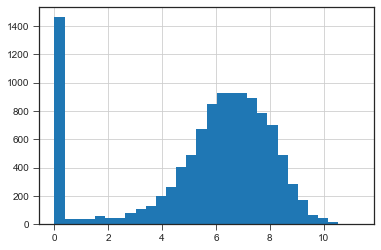

In [11]:
df["balance_log"].hist(bins=30)

<AxesSubplot:>

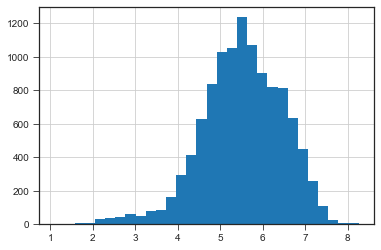

In [12]:
df["duration_log"].hist(bins=30)

Możemy teraz utworzyć nową listę ze zmiennymi i zobaczyć czy uzyskamy poprawę wyniku.

In [13]:
features2 = features.copy()
features2.remove("balance")
features2.append("balance_log")
CVTest(features=features2)

0.903838413061693

In [14]:
features2 = features.copy()
features2.remove("duration")
features2.append("duration_log")
CVTest(features=features2)

0.9007871281984505

Jak widać w przypadku balance uzyskaliśmy minimalną poprawę, a zmiana duration pogorszyła nasz wynik. 

## 2.2. Binaryzacja
W nasyzm zbiorze mamy też zmienną, która jest na swóə sposób nietypowa. Mamy sporo brakóœ danych, a pozostałe, niebrakujące są rozrzucone w swoich wartościach. Możemy spróbować zamienić tę zmienną na binarną i zobaczyć czy pozwoli nam to poprawić model.

<AxesSubplot:>

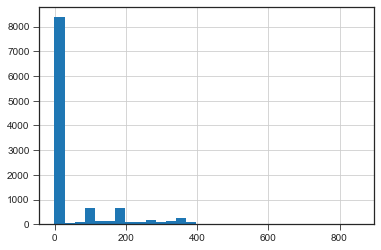

In [15]:
df["pdays"].hist(bins=30)

In [16]:
df["pdays_bin"] = np.digitize(df["pdays"], [0])
df["pdays_bin"].value_counts()


0    8324
1    2838
Name: pdays_bin, dtype: int64

In [17]:
features2 = features.copy()
features2.remove("pdays")
features2.append("pdays_bin")
CVTest(features=features2)

0.9030928483236671

Trudno tę zmianę nazwać zauważalną poprawę, ale jednocześnie prawdopodobnie nie pogroszyliśmy modelu. W większości przypadków uproszczenie modelu, które nie osłabia jego zdolności predykcyjnej jest skutecznym działaniem.

## 2.3 Grupowanie zmiennych
Często będziemy mieli do czynienia ze zmiennymi kategorycznymi, które przyjmują wiele lub bardzo wiele poziomów. Niektóre z tych grup będą mało liczne. W innych przypadkach grupy będą niemalże blizniacze znaczeniowo (dwa różne poziomy będą oznaczać niemalże to samo).

W innych sytuacjach kiedy zobaczymy, że dwa poziomy zmiennej dostają takie samo lub niemalże takie samo oszacowanie możemy chcieć je pogrupować. Uprościmy model, częściowo unikniemy niepotrzebnego nadmiernego dopasowania, co w rezultacie może pozwolić na poprawę skuteczności.

Przeanalizujmy wydruk dla jednego z foldu i popatrzmy na to jakie oszacowania dostały psozczególne miesiące.

In [15]:
CVTest(features=features, debug=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                        
===========================================================================================
Dep. Variable:     ['deposit[no]', 'deposit[yes]']   No. Observations:                 8930
Model:                                         GLM   Df Residuals:                     8887
Model Family:                             Binomial   Df Model:                           42
Link Function:                               logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -3654.7
Date:                             Wed, 08 Jul 2020   Deviance:                       7309.5
Time:                                     15:48:02   Pearson chi2:                 5.08e+07
No. Iterations:                                  6                                         
Covariance Type:                         nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.8119      0.301      2.701      0.007       0.223       1.401
job[T.blue-collar]         0.3801      0.116      3.276      0.001       0.153       0.607
job[T.entrepreneur]        0.3747      0.194      1.936      0.053      -0.005       0.754
job[T.housemaid]           0.6870      0.214      3.206      0.001       0.267       1.107
job[T.management]          0.2714      0.119      2.284      0.022       0.039       0.504
job[T.retired]            -0.3164      0.163     -1.942      0.052      -0.636       0.003
job[T.self-employed]       0.4947      0.181      2.739      0.006       0.141       0.849
job[T.services]            0.2659      0.135      1.966      0.049       0.001       0.531
job[T.student]            -0.4895      0.192     -2.549      0.011      -0.866      -0.113
job[T.technician]          0.2152      0.110      1.955      0.051      -0.001       0.431
job[T.unemployed]          0.1718      0.190      0.902      0.367      -0.201       0.545
job[T.unknown]             0.2174      0.380      0.572      0.567      -0.528       0.962
marital[T.married]         0.1545      0.095      1.621      0.105      -0.032       0.341
marital[T.single]         -0.1160      0.109     -1.063      0.288      -0.330       0.098
education[T.secondary]    -0.2104      0.104     -2.027      0.043      -0.414      -0.007
education[T.tertiary]     -0.4425      0.122     -3.641      0.000      -0.681      -0.204
education[T.unknown]      -0.2419      0.166     -1.457      0.145      -0.567       0.084
default[T.yes]            -0.0631      0.244     -0.259      0.796      -0.541       0.415
housing[T.yes]             0.7329      0.069     10.614      0.000       0.598       0.868
loan[T.yes]                0.4780      0.093      5.151      0.000       0.296       0.660
contact[T.telephone]       0.1764      0.120      1.471      0.141      -0.059       0.411
contact[T.unknown]         1.5855      0.109     14.549      0.000       1.372       1.799
month[T.aug]               0.7694      0.123      6.252      0.000       0.528       1.011
month[T.dec]              -1.2687      0.381     -3.328      0.001      -2.016      -0.522
month[T.feb]               0.0573      0.141      0.405      0.685      -0.220       0.334
month[T.jan]               1.2522      0.188      6.677      0.000       0.885       1.620
month[T.jul]               0.9076      0.124      7.342      0.000       0.665       1.150
month[T.jun]              -0.3966      0.148     -2.683      0.007      -0.686      -0.107
month[T.mar]              -2.2052      0.261     -8.445      0.000      -2.717      -1.693
month[T.may]               0

0.9030243526980369

Wydaje się, że niektóre miesiące mają w zasadzie takie samo oszacowania. Jak np sep i oct. Z jenej strony najbardziej "cieszylibyśmy się" gdyby podobne oszacowania były obok siebie w czasie i pozwalały nam na logiczne pogrupowanie miesięcy. Musimy jednak pamiętać, że mogą być inne zewnętrze zmienne ktore wpływają na to jak należy grupować miesiące (np. te miesiące kiedy aktywnie była prowadzona kampania marketingowa). Na razie pogrupujemy miesiąće na podstawie wartości oszacowań parametrów.

Następnie takie samo działanie wykonamy dla zmiennej opisującej zatrudnienie.

In [18]:
monthMap = {
    "mar":"high_negative",
    "dec":"negative",
    "oct":"negative",
    "sep":"negative",
    "jun":"low_negative",
    "feb":"zero",
    "apr":"zero",
    "may":"positive",
    "aug":"positive",
    "nov":"high_positive",
    "jul":"high_positive",
    "jan":"very_high_positive",
}

In [19]:
# Sprawdzamy czy nie zapomnieliśmy o jakimś poziomie.
df["month"].map(monthMap).isna().sum()

0

In [20]:
df["month_groupped"] = df["month"].map(monthMap)

In [21]:
features2 = features.copy()
features2.remove("month")
features2.append("month_groupped")
CVTest(features=features2)

0.9032550564666735

In [22]:
jobMap = {
    "student":"high_negative",
    "retired":"negative",
    "admin.":"zero",
    "unemployed":"positive_1",
    "technician":"positive_1",
    "unknown":"positive_1",
    "services":"positive_2",
    "management":"positive_2",
    "entrepreneur":"positive_3",
    "blue-collar":"positive_3",
    "self-employed":"positive_4",
    "housemaid":"positive_5",
}

In [23]:
# Sprawdzamy czy nei zapomnieliśmy o jakimś poziomie.
df["job"].map(jobMap).isna().sum()

0

In [24]:
df["job_groupped"] = df["job"].map(jobMap)

In [25]:
features2 = features.copy()
features2.remove("job")
features2.append("job_groupped")
CVTest(features=features2)

0.9031855263789257

Ponownie uzyskaliśmy minimalną, prawie niezauważalną poprawę.

### 2.4 Kategoryzacja zmiennej
Innym często stosowanym zabiegiem w przypadku zmiennych ciągłych jest ich zamiana na zmienną dyskretną. Wiek jest chyba najlepszym przykładem zmiennej pozornie ciągłej. W typowym życiu zmiany następują skokowo, np. przy okazji kończenia kolejnych etapów edukacji czy też przechodząc na emeryturę. Zobaczmy czy kiedy ręcznie zaproponujemy poziomy kategoryzacji dla wieku osiągniemy poprawę.

Na poczatku spojrzymy czy nasza kategoryzacja nie generuje zbyt małych grup.

In [26]:
pd.cut(df["age"], [0, 21, 25, 40, 60, 100]).value_counts(dropna=False)

(25, 40]     5745
(40, 60]     4356
(60, 100]     611
(21, 25]      379
(0, 21]        71
Name: age, dtype: int64

In [27]:
df["age_cut"] = pd.cut(df["age"], [0, 21, 25, 40, 60, 100])

In [28]:
features2 = features.copy()
features2.remove("age")
features2.append("age_cut")
CVTest(features=features2)

0.905373126437863

Ze wszystkich naszych dotychczasowych działań ta zmiana wydaje się być najskuteczniejsza. Sprawdźmy jak zachowa się model jeżeli zastosujemy wszystkie dotychczasowe zmiany.

In [29]:
features2 = features.copy()
features2.remove("balance")
features2.append("balance_log")

features2.remove("pdays")
features2.append("pdays_bin")

features2.remove("month")
features2.append("month_groupped")

features2.remove("job")
features2.append("job_groupped")

features2.remove("age")
features2.append("age_cut")

CVTest(features=features2, debug=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                        
===========================================================================================
Dep. Variable:     ['deposit[no]', 'deposit[yes]']   No. Observations:                 8930
Model:                                         GLM   Df Residuals:                     8893
Model Family:                             Binomial   Df Model:                           36
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -3597.1
Date:                             Tue, 07 Dec 2021   Deviance:                       7194.3
Time:                                     19:59:12   Pearson chi2:                 4.76e+07
No. Iterations:                                 19   Pseudo R-squ. (CS):             0.4391
Covariance Type:                         nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       16.3551   1.17e+04      0.001      0.999   -2.29e+04    2.29e+04
marital[T.married]                               0.1840      0.096      1.919      0.055      -0.004       0.372
marital[T.single]                               -0.0550      0.108     -0.508      0.611      -0.267       0.157
education[T.secondary]                          -0.2376      0.105     -2.262      0.024      -0.443      -0.032
education[T.tertiary]                           -0.5065      0.116     -4.350      0.000      -0.735      -0.278
education[T.unknown]                            -0.1848      0.166     -1.111      0.266      -0.511       0.141
default[T.yes]                                  -0.2604      0.248     -1.050      0.294      -0.747       0.226
housing[T.yes]                                   0.6543      0.066      9.935      0.000       0.525       0.783
loan[T.yes]                                      0.4234      0.093      4.534      0.000       0.240       0.606
contact[T.telephone]                             0.2930      0.122      2.400      0.016       0.054       0.532
contact[T.unknown]                               1.5074      0.105     14.373      0.000       1.302       1.713
poutcome[T.other]                                0.0364      0.148      0.247      0.805      -0.253       0.326
poutcome[T.success]                             -2.1087      0.157    -13.417      0.000      -2.417      -1.801
poutcome[T.unknown]                            -18.1044   1.17e+04     -0.002      0.999   -2.29e+04    2.29e+04
month_groupped[T.high_positive]                  3.0287      0.255     11.880      0.000       2.529       3.528
month_groupped[T.low_negative]                   1.7873      0.268      6.679      0.000       1.263       2.312
month_groupped[T.negative]                       1.1166      0.277      4.029      0.000       0.573       1.660
month_groupped[T.positive]                       2.8608      0.251     11.375      0.000       2.368       3.354
month_groupped[T.very_high_positive]             3.4308      0.299     11.463      0.000       2.844       4.017
month_groupped[T.zero]                           2.2350      0.255      8.774      0.000       1.736       2.734
job_groupped[T.negative]                         0.4678      0.247      1.894      0.058      -0.016       0.952
job_groupped[T.positive_1]                       0.3206      0.196      1.633      0.103      -0.064       0.705
job_groupped[T.positive_2]                       0.3970      0.196      2.030      0.042       0.014       0.780
jo

0.9066820830307247

Chociaż uzyskana poprawa nie jest rewelacyjna i w zasadzie nie może konkurować z innymi algorytmami, jak chociażby Random Forest, to jest krokiem w dobrym kierunku i udanym przykładem generowania nowych zmiennych.